# DecisionTree

- from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

- 파라미터
  
  1. min_samples_split : 노드분할을 위한 최소한의 샘플 데이터
  2. min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터
  3. max_features : 최적 분할을 위해 고려할 최대 피쳐 개수
  4. max_depth : 트리의 최대 깊이 규정
  5. max_leaf_nodes : 리프 노드의 최대 개수 지정
  
  
- 메서드
  
  1. feature_importances_ : 속성별 중요도 출력

In [1]:
!pip install Graphviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import graphviz
import warnings
warnings.filterwarnings('ignore')

# iris data

In [3]:
#decisiontree 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# load data and split
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=156)

# 학습
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=156)

## 1. 제약 없는 의사결정나무 트리 생성

[Text(206.03076923076924, 605.7257142857143, 'X[2] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [41, 41, 38]'),
 Text(154.52307692307693, 512.537142857143, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(257.53846153846155, 512.537142857143, 'X[2] <= 4.75\ngini = 0.499\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(103.01538461538462, 419.34857142857146, 'X[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(51.50769230769231, 326.16, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 326.16, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(412.0615384615385, 419.34857142857146, 'X[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(257.53846153846155, 326.16, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(206.03076923076924, 232.9714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(309.04615384615386, 232.9714285714286, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(2

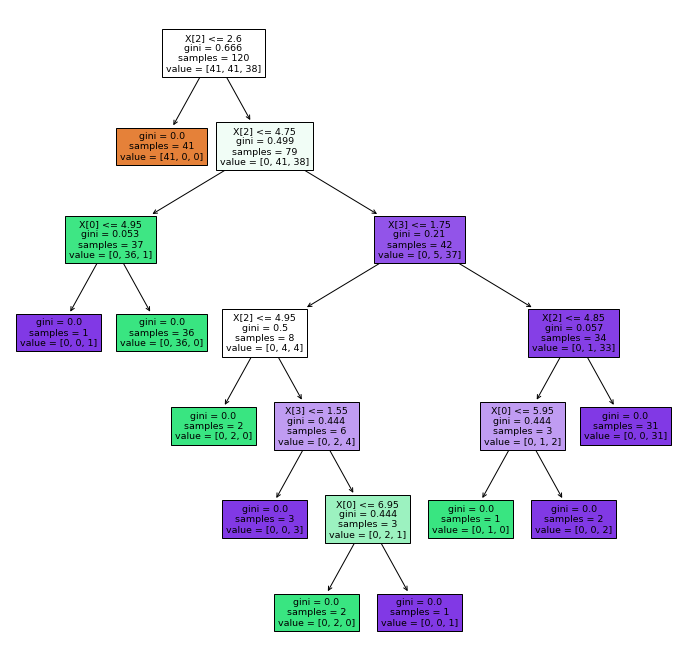

In [4]:
plt.figure(figsize=(12,12))
plot_tree(decision_tree=dt_clf, filled = True)

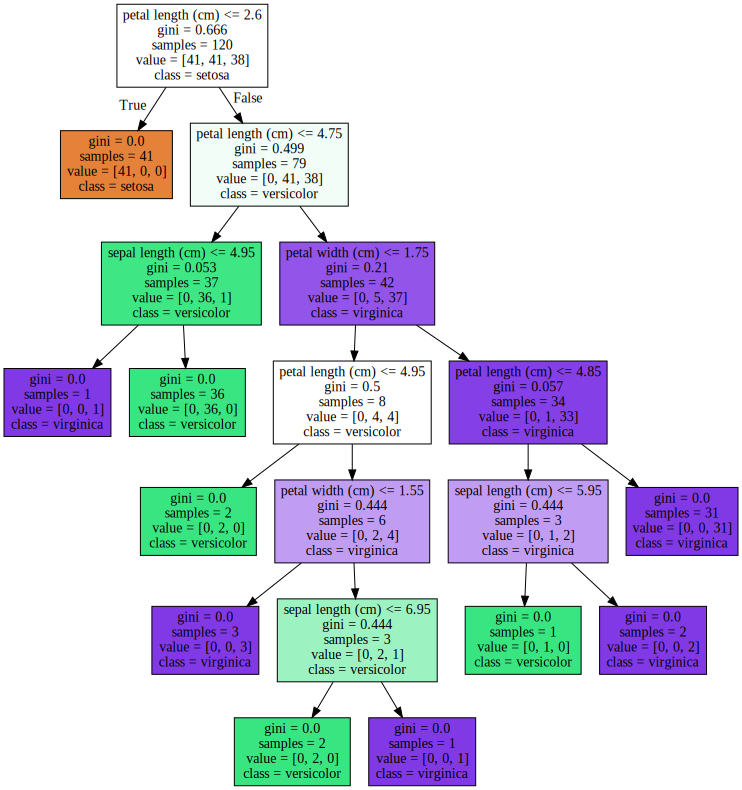

In [5]:
# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity = True, filled = True)

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## 3. max_depth = 3일 경우의 트리

[Text(251.10000000000002, 570.7800000000001, 'X[2] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [41, 41, 38]'),
 Text(167.4, 407.70000000000005, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(334.8, 407.70000000000005, 'X[2] <= 4.75\ngini = 0.499\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(167.4, 244.62, 'X[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(83.7, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(502.20000000000005, 244.62, 'X[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(418.5, 81.53999999999996, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(585.9, 81.53999999999996, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

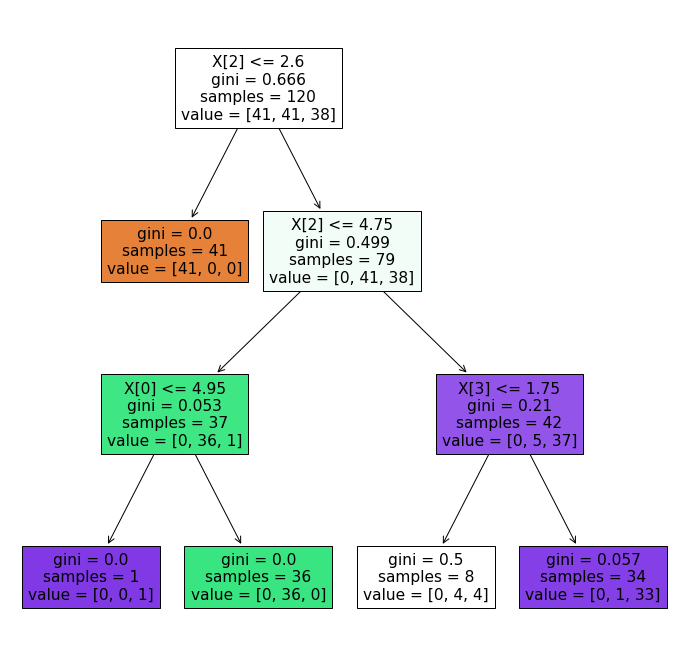

In [6]:
dt_clf_max3 = DecisionTreeClassifier(random_state=156,max_depth=3)
dt_clf_max3.fit(X_train,y_train)

plt.figure(figsize=(12,12))
plot_tree(decision_tree = dt_clf_max3, filled = True, impurity = True)

## 3. min_sample_split = 4일 경우의 트리

- 위의 조건은 자식노드로 분할하기 위해 서로 다른 샘플이 최소 4개 이상 필요하다.

[Text(213.05454545454546, 597.96, 'X[2] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [41, 41, 38]'),
 Text(152.1818181818182, 489.24, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(273.92727272727274, 489.24, 'X[2] <= 4.75\ngini = 0.499\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(121.74545454545455, 380.52000000000004, 'X[0] <= 4.95\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(60.872727272727275, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(182.61818181818182, 271.8, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(426.1090909090909, 380.52000000000004, 'X[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(304.3636363636364, 271.8, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(243.4909090909091, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(365.23636363636365, 163.07999999999998, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(304.3636363636364, 54.3600000000000

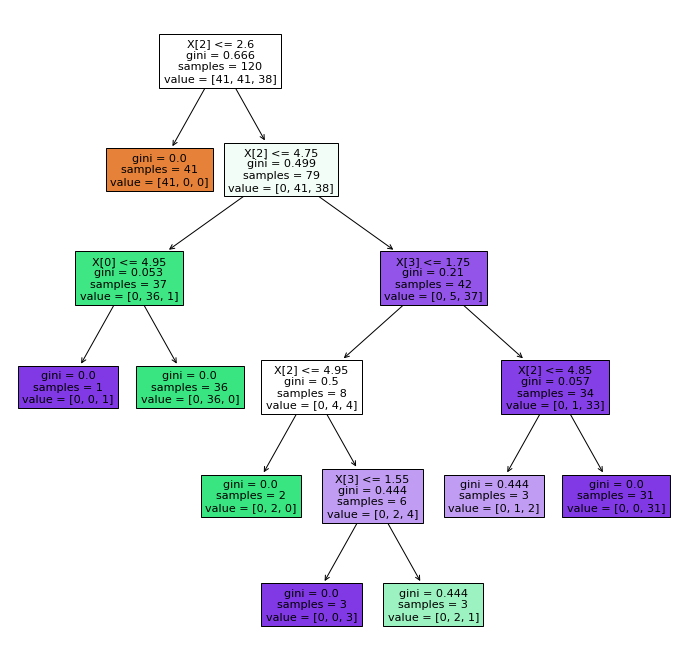

In [7]:
dt_clf_min_split4 = DecisionTreeClassifier(random_state=156,min_samples_split = 4)
dt_clf_min_split4.fit(X_train,y_train)

plt.figure(figsize=(12,12))
plot_tree(decision_tree = dt_clf_min_split4, filled = True, impurity = True)

## 4. min_sample_leaf  = 4일 경우의 트리

- 위의 조건은 샘플이 4개가 될 경우 리프노드가 될 수 있음을 의미한다

[Text(213.05454545454546, 587.0880000000001, 'X[2] <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [41, 41, 38]'),
 Text(152.1818181818182, 456.624, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(273.92727272727274, 456.624, 'X[2] <= 4.75\ngini = 0.499\nsamples = 79\nvalue = [0, 41, 38]'),
 Text(121.74545454545455, 326.1600000000001, 'X[0] <= 5.3\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(60.872727272727275, 195.69600000000003, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(182.61818181818182, 195.69600000000003, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(426.1090909090909, 326.1600000000001, 'X[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(304.3636363636364, 195.69600000000003, 'X[2] <= 5.05\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(243.4909090909091, 65.23200000000008, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(365.23636363636365, 65.23200000000008, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Tex

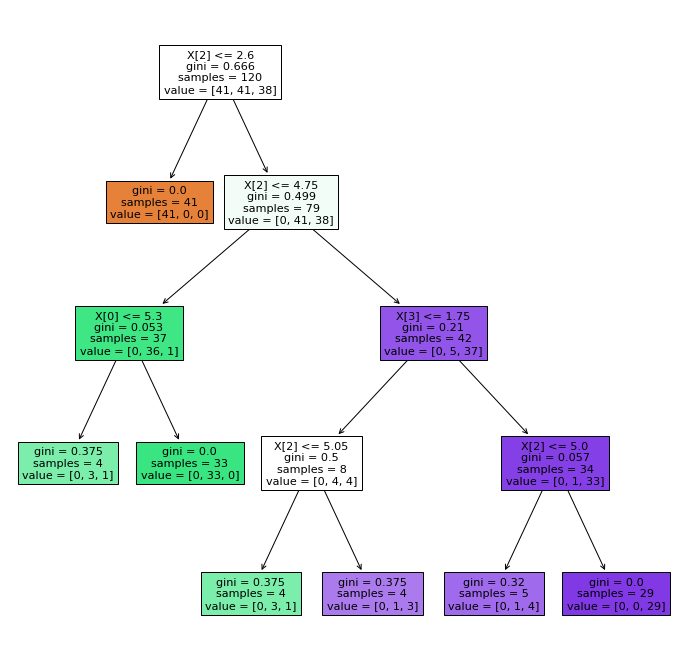

In [8]:
dt_clf_min_leaf4 = DecisionTreeClassifier(random_state=156,min_samples_leaf = 4)
dt_clf_min_leaf4.fit(X_train,y_train)

plt.figure(figsize=(12,12))
plot_tree(decision_tree = dt_clf_min_leaf4, filled = True, impurity = True)

## 5. feature_importances_ 속성을 통해 피쳐별 중요도 파악

Feature importances : 
[0.058 0.    0.89  0.053]
sepal length (cm) : 0.058
sepal width (cm) : 0.000
petal length (cm) : 0.890
petal width (cm) : 0.053


<AxesSubplot:>

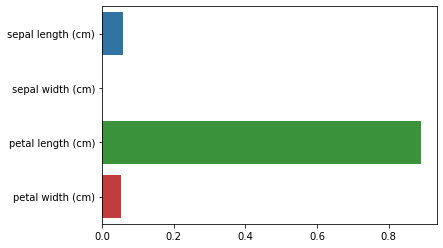

In [9]:
# feature importance 추출
print('Feature importances : \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# 시각화
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

## 6. 결정트리의 과적합 탐색

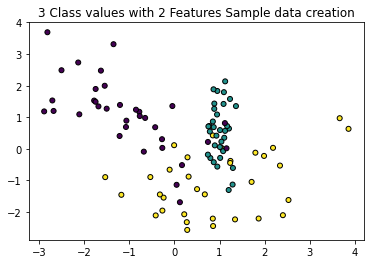

In [10]:
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                          n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 그래프 형태로 2개의 피처를 2차원 좌표 시각화, 각 클래스 값은 서로 다른 값으로 출력
plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c = y_labels, s= 25, edgecolor = 'k')

### (1) 제약조건이 없는 모델

- 아래 그림만 보아도 모델이 복잡함을 알 수 있다.

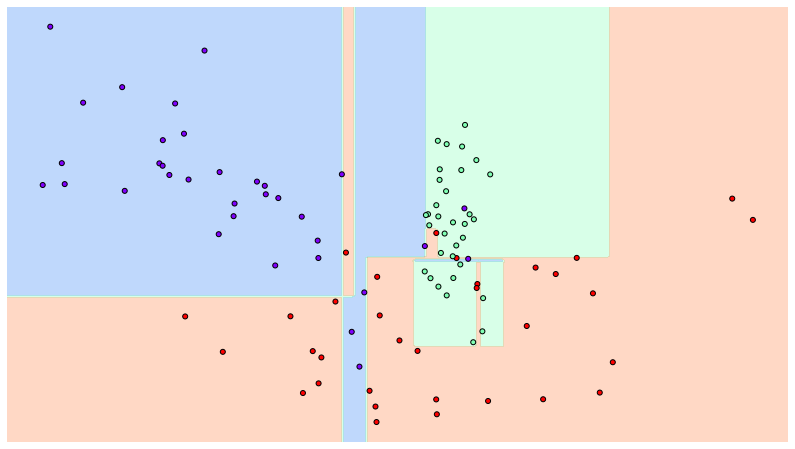

In [11]:
# 위의 데이터를 가지고 제약없는 트리 모델 생성
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots(figsize = (14,8))
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

visualize_boundary(dt_clf, X_features, y_labels)

### (1) min_samples_leaf = 6으로 트리 생성

- 

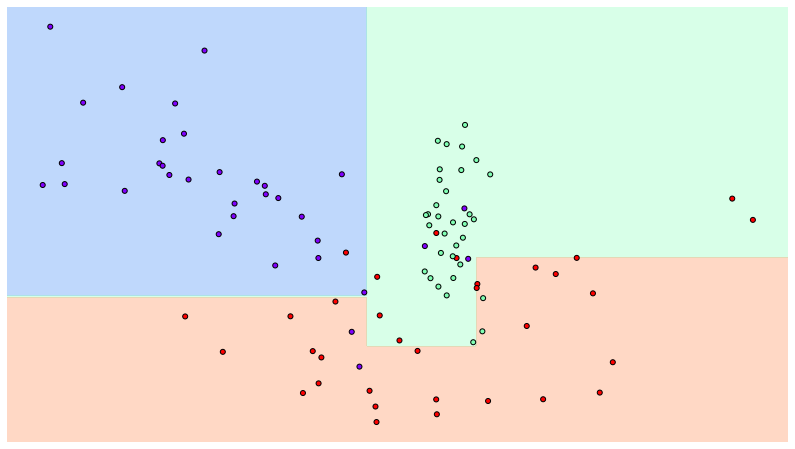

In [12]:
# 위의 데이터를 가지고 제약없는 트리 모델 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)

# UCI HAR Dataset

## 1. 데이터 불러오기

In [21]:
feature_name_df = pd.read_csv('C:/Users/Park/_Python_data/UCI HAR Dataset/features.txt',sep='\s+',
                             header=None, names = ['column_index','column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [22]:
# 피처명이 방대하고 구분이 어렵다. 따라서 혹시 모를 중복을 위해 중복검사를 실시한다.
# 검사결과 42개의 행이 중복됨을 알 수 있다.

feature_dup_df = feature_name_df.groupby(by = 'column_name').count()
print(feature_dup_df[feature_dup_df.column_index > 1].count())
feature_dup_df[feature_dup_df.column_index > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


## 2. 중복 피처 값 분리 후 데이터 생성

- 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수 생성

In [23]:
# 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    # coucount() : 중복된 값이 몇번째 중복되었는지 출력
    # 예를들어 a, a, a, b, a, b 일 경우 0, 1, 2, 0, 1, 3 출력
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how= 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'-'+str(x[1])
                                                                                              if x[1] >0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [24]:
def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/Users/Park/_Python_data/UCI HAR Dataset/features.txt',sep='\s+',
                             header=None, names = ['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('C:/Users/Park/_Python_data/UCI HAR Dataset/train/X_train.txt',sep='\s+', names = feature_name)
    X_test = pd.read_csv('C:/Users/Park/_Python_data/UCI HAR Dataset/test/X_test.txt',sep='\s+', names = feature_name)
    y_train = pd.read_csv('C:/Users/Park/_Python_data/UCI HAR Dataset/train/y_train.txt',sep='\s+',
                          header = None, names = ['action'])
    y_test = pd.read_csv('C:/Users/Park/_Python_data/UCI HAR Dataset/test/y_test.txt',sep='\s+',
                          header = None, names = ['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()
display(X_train)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## 3. 모델 학습

In [27]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정트리 예측 정확도 : {0:.4f}'.format(accuracy))
print('-'*30)
print('DecisionTreeClassifier 기본 하이퍼파리미터 : \n', dt_clf.get_params())

결정트리 예측 정확도 : 0.8548
------------------------------
DecisionTreeClassifier 기본 하이퍼파리미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


## 4. 하이퍼파라미터 조정 

- GridSearchCV의 verbose : iteration시마다 수행 결과 메시지를 출력합니다.
  
  1) verbose=0(default)면 메시지 출력 안함
  
  2) verbose=1이면 간단한 메시지 출력
  
  3) verbose=2이면 하이퍼 파라미터별 메시지 출력

### (1) max_depth

In [28]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train,y_train)

print('gridsearch 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('gridsearch 최적 하이퍼파라미터 : ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
gridsearch 최고 평균 정확도 수치 : 0.8513
gridsearch 최적 하이퍼파라미터 :  {'max_depth': 16}


In [29]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [30]:
# 위의 결과 max_depth = 8 에서 우수한 성능이 기대된다.(더 깊어질수록 과적합 위험)
# 이번엔 교차검증이 아닌 max_depth를 반복문을 통해 accuracy 출력

max_depth = [6,8,10,12,16,20,24]
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth = {0} accuracy : {1:.4f}'.format(depth, accuracy))

max_depth = 6 accuracy : 0.8558
max_depth = 8 accuracy : 0.8707
max_depth = 10 accuracy : 0.8673
max_depth = 12 accuracy : 0.8646
max_depth = 16 accuracy : 0.8575
max_depth = 20 accuracy : 0.8548
max_depth = 24 accuracy : 0.8548


### (2) max_depth와 min_samples_split을 동시에 사용하여 최적 파라미터 추정

In [31]:
params = {'max_depth':[6,8,10,12,16,20,24],
         'min_samples_split' : [16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train,y_train)

print('gridsearch 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('gridsearch 최적 하이퍼파라미터 : ',grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
gridsearch 최고 평균 정확도 수치 : 0.8549
gridsearch 최적 하이퍼파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [32]:
# best_estimator_는 gridsearchcv에서 최적 하이퍼라마미터를 사용하여 데이터 세트 학습을 수행하는 속성이다.
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8548


<AxesSubplot:title={'center':'Feature importances Top 20'}>

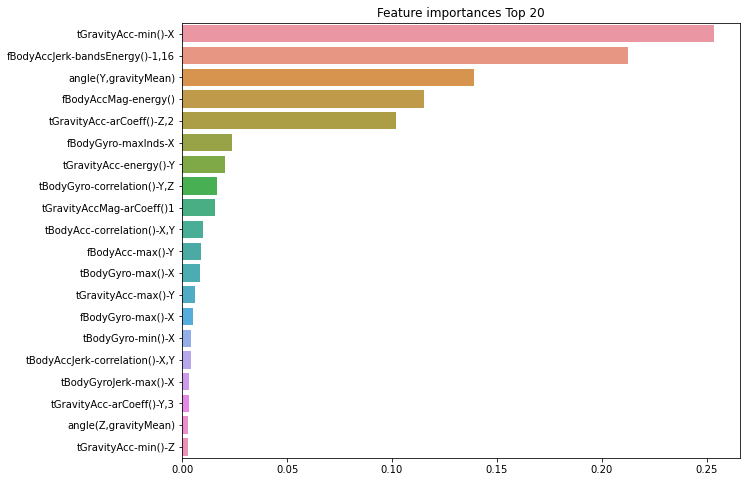

In [33]:
ftr_importances_values = best_dt_clf.feature_importances_

# top 중요도로 정렬을 쉽게 하고, seaborn의 막대그래프로 쉽게 표현하기 위해 시리즈로 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도 순으로 series 정렬
ftr_top_20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(10,8))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top_20, y = ftr_top_20.index)